In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Netflix\mymoviedb.csv", lineterminator='\n')

In [3]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [4]:
# Check for null values
print(df.isnull().sum().sum())

0


In [5]:
# Check for duplicated rows
print(df.duplicated().sum().sum())

0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [8]:
df['Release_Year'] = df['Release_Date'].dt.year

In [9]:
df = df.drop(['Overview', 'Poster_Url'], axis=1)

In [10]:
df['Original_Language'].value_counts().head(10)

data = {'Original_Language': ['en', 'ja', 'es', 'fr', 'ko', 'zh', 'it', 'cn', 'ru', 'de', 'pt']}
language = pd.DataFrame(data)
lang_map = {
    'en': 'English',
    'ja': 'Japanese',
    'es': 'Spanish',
    'fr': 'French',
    'ko': 'Korean',
    'zh': 'Chinese (Mandarin)',
    'it': 'Italian',
    'cn': 'Chinese (Simplified)',
    'ru': 'Russian',
    'de': 'German',
    'pt': 'Portuguese'
}
df['Original_Language'] = language['Original_Language'].replace(lang_map)

In [11]:
df.head(1)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction",2021


# Most frequent genre of movies 

In [35]:
genre = df['Genre'].value_counts(sort=True).head(10)
freq_genre = pd.DataFrame(genre)
freq_genre.columns = ['total_freq']
freq_genre = freq_genre.reset_index()
freq_genre.columns = ['genre', 'total_freq']
freq_genre.head(10)

,genre,total_freq
0,Drama,466
1,Comedy,403
2,"Drama, Romance",248
3,Horror,238
4,"Horror, Thriller",199
5,"Comedy, Romance",196
6,Documentary,139
7,"Comedy, Drama",137
8,"Action, Thriller",125
9,"Comedy, Drama, Romance",107


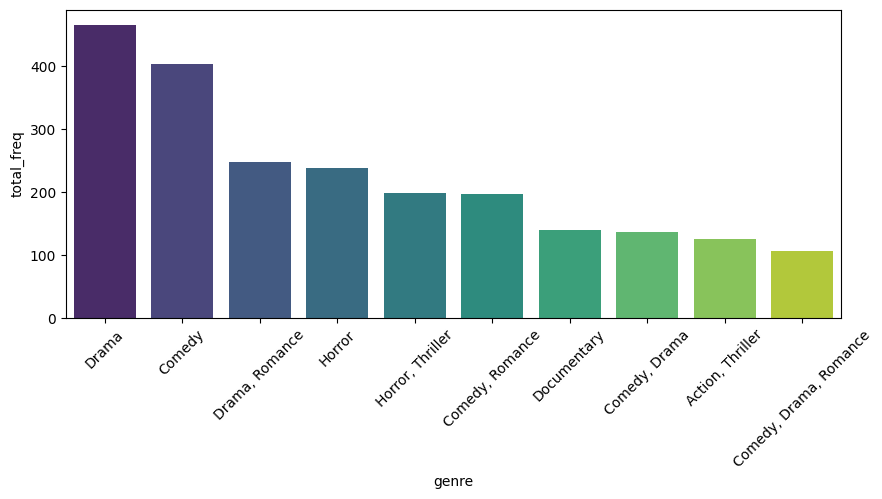

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(data=freq_genre, x='genre', y = 'total_freq', palette="viridis")
plt.xticks(rotation=45)
plt.show()